In [71]:
# carregue os conjuntos de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

titanic = pd.read_csv('titanic_data.csv')
# primeiras linhas
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Descrição das colunas

Survived: Diz se o passageiro sobreviveu (0 = Não; 1 = Sim)
Pclass: Classe socio-econômica do passageiro (1 = Classe Alta; 2 = Classe Média; 3 = Classe Baixa)
Name: Nome do passageiro
Sex: Sexo do Passageiro
Age: Idade do passageiro
SibSp: Número de irmãos e cônjuges a bordo
Parch: Número de pais e filhos a bordo
Ticket: Número do ticket do passageiro
Fare: Tarifa paga pelo passageiro
Cabin: Número da cabine
Embarked: Porta de embarcação (C = Cherbourg; Q = Queenstown; S = Southampton)

In [43]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,148,4
top,NaN,NaN,NaN,"Masselmani, Mrs. Fatima",male,NaN,NaN,NaN,1601,NaN,NA,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Inicio da análise

A intenção desta análise é entender qual ou quais os fatores ou combinações que contribuíram para a sobrevivência da tragédia. A partir algumas perguntas que podem fornecer alguns são indicios são:

Proporcionalmente, havia mais homens ou mulheres que sobreviveram?
A idade do passageiro teve influência na sua taxa de sobrevivência?
A quantidade de passageiros com esposas e/ou filhos indica uma taxa de sobrevivência mais alta?
É possível ver alguma relação com a sobrevivência ao observar as diferenças entre os genêros?
Havia alguma relação entre a classe em que você estava viajando e as chances de sobrevivência da tragédia?
Houve uma proporção masculina / feminina diferente nas diferentes classes? Isso afetou suas chances de sobrevivência?

O projeto se concentrará em responder a todas essas perguntas, mas sempre através das lentes dos fatores que contribuíram para a sobrevivência da tragédia.

In [44]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Se olharmos apenas para os passageiros, havia aproximadamente 1300 saindo com o navio e 812 mortos, deixando a taxa de sobrevivência de passageiros em um nível de 38%, o que é exatamente a mesma da nossa amostra - 38%. Assim, a expectativa é que a nossa amostra seja fiel ao total.

# Limpeza dos dados

Antes de mergulhar nas questões, o conjunto de dados será analisado para identificar anomalias relacionadas à validade, exatidão ou integridade dos dados e, se possível, corrigir tais problemas.

In [114]:
# Revela quais colunas tem células vazias
titanic.isna().sum()[titanic.isna().sum() != 0]/titanic.shape[0] * 100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

Ao analisar os valores faltantes de coluna, a cabine é o que apresenta o maior indice com 77% das observações em falta.

In [6]:
#Para preencher as células vazias, substituimos todas pela idade média de todos os passageiros.
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [7]:
# substituir as células vazias por NA
titanic['Embarked'].fillna(value='NA', inplace=True)

In [8]:
# substituir as células vazias por NA
titanic['Cabin'].fillna(value='NA', inplace=True)

In [119]:
# conferindo se todos os valores faltantes foram eliminados
titanic.isna().sum()[titanc.isna().sum() != 0]/titanic.shape[0] * 100

Series([], dtype: float64)

Pronto agora a base de dados está completa.

In [76]:
# conferindo a quantidade de valores únicos em Cabine
titanic['Cabin'].value_counts()

NA                 687
G6                   4
C23 C25 C27          4
B96 B98              4
D                    3
C22 C26              3
F2                   3
E101                 3
F33                  3
E8                   2
C123                 2
B5                   2
B20                  2
D26                  2
E33                  2
C78                  2
B77                  2
D33                  2
C92                  2
D20                  2
E121                 2
B58 B60              2
C52                  2
E44                  2
B49                  2
B57 B59 B63 B66      2
F4                   2
F G73                2
E67                  2
B35                  2
                  ... 
E46                  1
A24                  1
E36                  1
C128                 1
F G63                1
B19                  1
C54                  1
D46                  1
C111                 1
C45                  1
B101                 1
E38                  1
A32        

A contagem de células similares em Cabin revela que os existe uma pluralidade de valores únicos, e ainda sim 77% do volume das informações estavam vazias, neste caso ainda não é possível tirar alguma conclusão sobre a influência desta variável na taxa de sobrevivência.

# Local de embarque dos passageiros

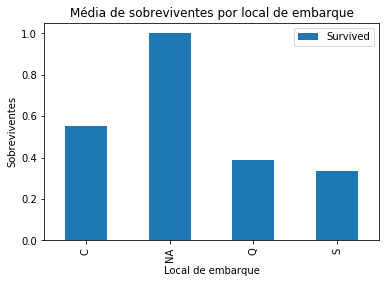

In [29]:
# Composição do gráfico em barras dos sobreviventes por local de embarque
titanic[['Survived']].groupby([titanic['Embarked']]).mean().plot.bar()
plt.title('Média de sobreviventes por local de embarque')
plt.xlabel('Local de embarque')
plt.ylabel('Sobreviventes')
plt.show()

É possível observar que os pessoas que embarcaram em Cherbourg tiveram maiores chances de sobreviver, no entanto não há qualquer explicação para o fato.

# Gênero dos passageiros

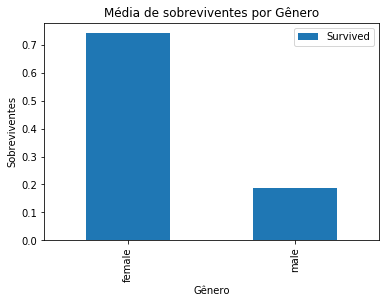

In [42]:
titanic[['Survived']].groupby(titanic['Sex']).mean().plot.bar()
plt.title('Média de sobreviventes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Sobreviventes')
plt.show()

Ao observamos que a chance das mulheres sobrevivem foi muito superior ao genero masculino, talvez nesse ponto fique evidente a premissa de mulheres e crianças primeiro.

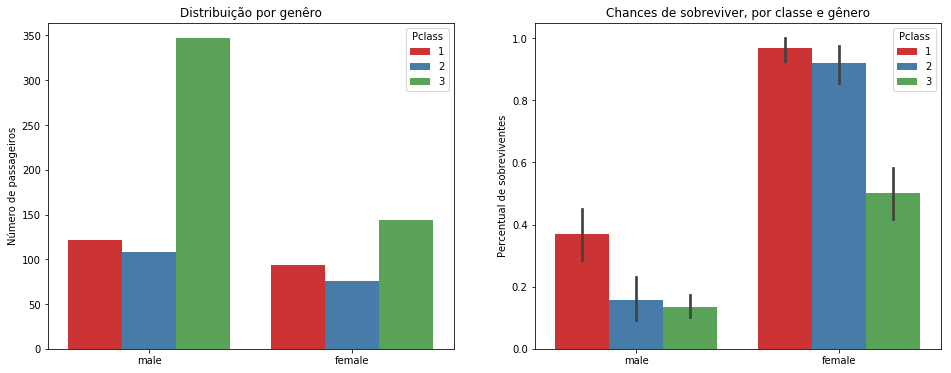

In [70]:
#Avaliar por classe a quantidade de cada gênero e as respectivas chances de sobreviver a tragédia
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

sns.countplot(x="Sex", hue="Pclass", palette="Set1", data=titanic, ax=ax1)
ax1.set_title("Distribuição por genêro")
ax1.set_xlabel("")
ax1.set_ylabel("Número de passageiros")

sns.barplot(x="Sex", y="Survived", hue="Pclass", palette="Set1", data=titanic, ax=ax2)
ax2.set_title("Chances de sobreviver, por classe e gênero")
ax2.set_xlabel("")
ax2.set_ylabel("Percentual de sobreviventes")

plt.show()

Não apenas ser uma mulher afetou suas chances de sobrevivência, mas, acima de tudo, como uma mulher que você estava viajando na 1ª ou na 2ª classe, você estava quase garantido para passar. Mas ser um homem tornou as coisas ainda piores: apesar das chances de sobrevivência por estarem na 1ª classe eram mais do que o dobro do que as da 2ª e 3ª, eles ainda eram mais menores do que as mulheres na 3ª classe.

# Idade dos passageiros

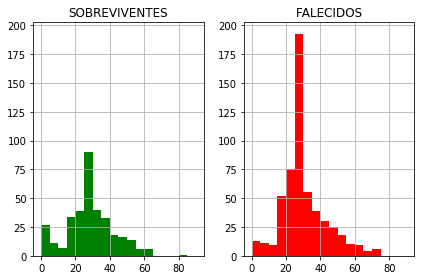

In [45]:
#Avaliar por idade a quantidade de cada gênero e as respectivas chances de sobreviver a tragédia

bins=[b for b in range(0, 91, 5)]
fig = plt.figure()
# ax0 = plt.subplot2grid((1, 2), (0, 0), colspan=2)
# plt.title("Age Histogram")

ax1 = plt.subplot2grid((1, 2), (0, 0))
titanic['Age'][titanic['Survived'] == 1].hist(bins=bins, color='g')
plt.title("SOBREVIVENTES")
ax2 = plt.subplot2grid((1, 2), (0, 1), sharey=ax1)
titanic['Age'][titanic['Survived'] == 0].hist(bins=bins, color='r')
plt.title("FALECIDOS")
plt.tight_layout()
plt.show()

Uma diferença notável entre os grupos de faixa etária entre os passageiros sobreviventes e falecidos, é fato que as crianças pequenas tinham maior probabilidade de sobreviver.

# Classe dos passageiros

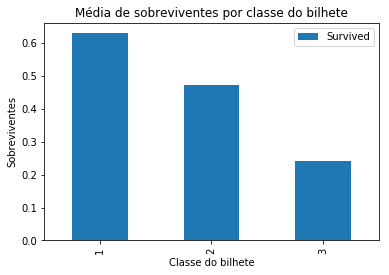

In [27]:
titanic[['Survived']].groupby(titanic['Pclass']).mean().plot.bar()
plt.title('Média de sobreviventes por classe do bilhete')
plt.xlabel('Classe do bilhete')
plt.ylabel('Sobreviventes')
plt.show()

A classe do bilhete, indicando uma condição de classe econômica mas privilegiada e por fim quanto maior a classe, mais próximas as cabines estavam do barco salva-vidas. Sem dúvida um fator importante na sobrevivência, já que podemos observar no gráfico que os que estavam na primeira classe tiveram mais chance de sobreviver.

# Familía dos passageiros

In [105]:
# Conta valores únicos de parentes por passageiros
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Definitivamente a maioria dos passageiros não tinham parentes no navio.

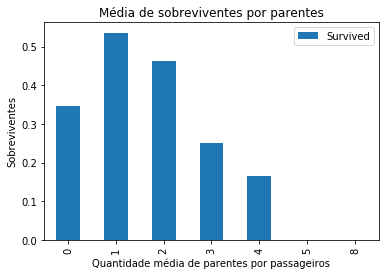

In [25]:
titanic[['Survived']].groupby([titanic['SibSp']]).mean().plot.bar()
plt.title('Média de sobreviventes por parentes')
plt.xlabel('Quantidade média de parentes por passageiros')
plt.ylabel('Sobreviventes')
plt.show()

É possível ver que aqueles que tinham ao menos 1 parente no navio tinham mais chance de sobreviver.

In [98]:
# Conta valores únicos de filhos por passageiros
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Definitivamente a maioria não tinha filhos, e como vimos anteriormente ser criança era um fator que aumentava a chances de sobrevivência.

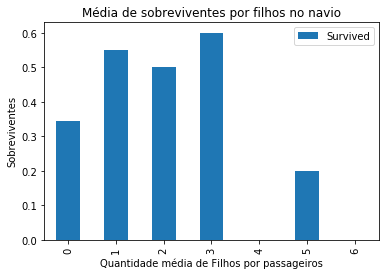

In [24]:
titanic[['Survived']].groupby([titanic['Parch']]).mean().plot.bar()
plt.title('Média de sobreviventes por filhos no navio')
plt.xlabel('Quantidade média de Filhos por passageiros')
plt.ylabel('Sobreviventes')
plt.show()

É difícil ver padrão no gráfico acima. Dado o fato de que ambos se relacionam com o número de membros da família, podemos ver ambos combinados.

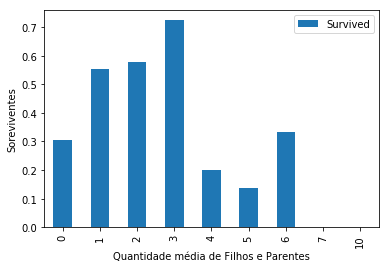

In [57]:
#Média de sobreviventes segmentado pelo agrupamento de Filhos e Parentes
titanic[['Survived']].groupby([titanic['Parch'] + titanic['SibSp']]).mean().plot.bar()
plt.xlabel('Quantidade média de Filhos e Parentes')
plt.ylabel('Soreviventes')
plt.show()

Parece que a maioria dos passageiros não tinha membros da família a bordo, quanto aqueles que tinham sobreviveram com maior frequência.

# Conclusão

Em primeiro lugar, o número de passageiros no momento do acidente varia entre 3.327 a 3.547, dependendo das fontes. Portanto, temos dados limitados em mãos e tirar conclusões de um conjunto pequeno pode apontar para causas enganosas.

Além disso, nós não temos registros de idade de uma grande parte do conjunto de dados, cuja maioria foi inferida pela média da idade. Apesar de ser um bom indicador, não é tão confiável quanto ter os dados completos e pode ser propenso a erros em nossas conclusões.

Alguns dados adicionais também poderiam ter sido úteis para o estudo. Por exemplo, a distância entre a cabine e os barcos salva-vidas é definitivamente um ótimo elo que não conseguimos explorar. Alem do fato de que quase todos os dados de cabine estão faltando (apenas 204 valores não nulos de 891). Relacionado a isso, o deck onde a cabine estava localizada poderia ter sido um uma informação valiosoa que poderíamos ter usado descobrir o quanto a altura influenciava na taxa de sobrevivência.

Após passar por alguns dados é possível observar que existem váriaveis que aumentam a chance de sobrevivência entre os passageiros. Entre tudo que foi observado nesta análise posso concluir que as chances aumentavam a medida que: o gênero fosse feminino, ser criança, ter ticket de primeira classe, embarque realizado por Cherbourg e por fim ter membros da familia entre os passageiros.